## Principal Component Analysis - Image Compression

This code shows an example of using PCA (Principal Component Analysis) to try
and capture the essence of a photo with much less data than it is originally
described with. We use a set of 5000 images of faces, each one described by 
1024 features (colors of the pixels). Using PCA this is reduced to 100 features
and the image is plotted again to compare it with the original. This way, the 
images are basically compressed but still retain their basic features. 

Try it for both more and less than 100 features, even go as far up as 1000 and as far down as 1, 2, or 3. 

### PCA, projection, and reconstruction functions

In [7]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import loadmat

def pca(X):
    # normalize the features
    X = (X - X.mean()) / X.std()    
    # compute the covariance matrix
    X = np.matrix(X)
    cov = (X.T * X) / X.shape[0]    
    # perform SVD
    U, S, V = np.linalg.svd(cov)    
    return U, S, V

def project_data(X, U, k):
    # reduce the dimension to k
    U_reduced = U[:,:k]
    # project the data on k-hyperplane
    return np.dot(X, U_reduced)

def recover_data(Z, U, k):
    # recover the data to show how they would look after the compression
    U_reduced = U[:,:k]
    return np.dot(Z, U_reduced.T)

### Import and prepare data, print a portrait

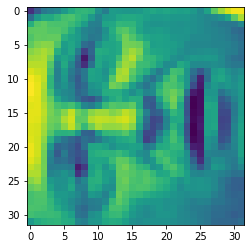

In [8]:
# Load data:
faces = loadmat('ex7faces.mat')
X = faces['X']

face_no = 3 # which portrait will we show (0-4999)
# Arrange one of the faces in a square matrix (fourth one for example) and plot it:
face = np.reshape(X[face_no,:], (32, 32))
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.imshow(face)

### Perform PCA, and then show recovered portrait

Variance retained:  0.943427351936446


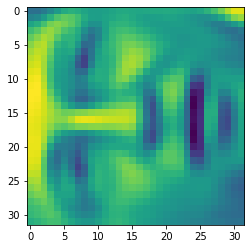

In [10]:
# Perform PCA on the data: 
U, S, V = pca(X)
k = 100
Z = project_data(X, U, k)
X_recovered = recover_data(Z, U, k)

# Arrange the recovered features of the face in a square matrix and plot it:
face = np.reshape(X_recovered[face_no,:], (32, 32))
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.imshow(face) 

print ("Variance retained: ",sum(S[:k])/sum(S))